In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PARKINSON'S DISEASE CLASSIFICATION:-

In [2]:
df = pd.read_csv('/content/pd_speech_features.csv')
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


Let's look at the attributes of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [4]:
df.shape

(756, 755)

In [5]:
#checking for null values
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [6]:
df.drop(['id','gender'],axis=1)

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,0.00008,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,0.00016,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,0.00011,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,0.00017,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


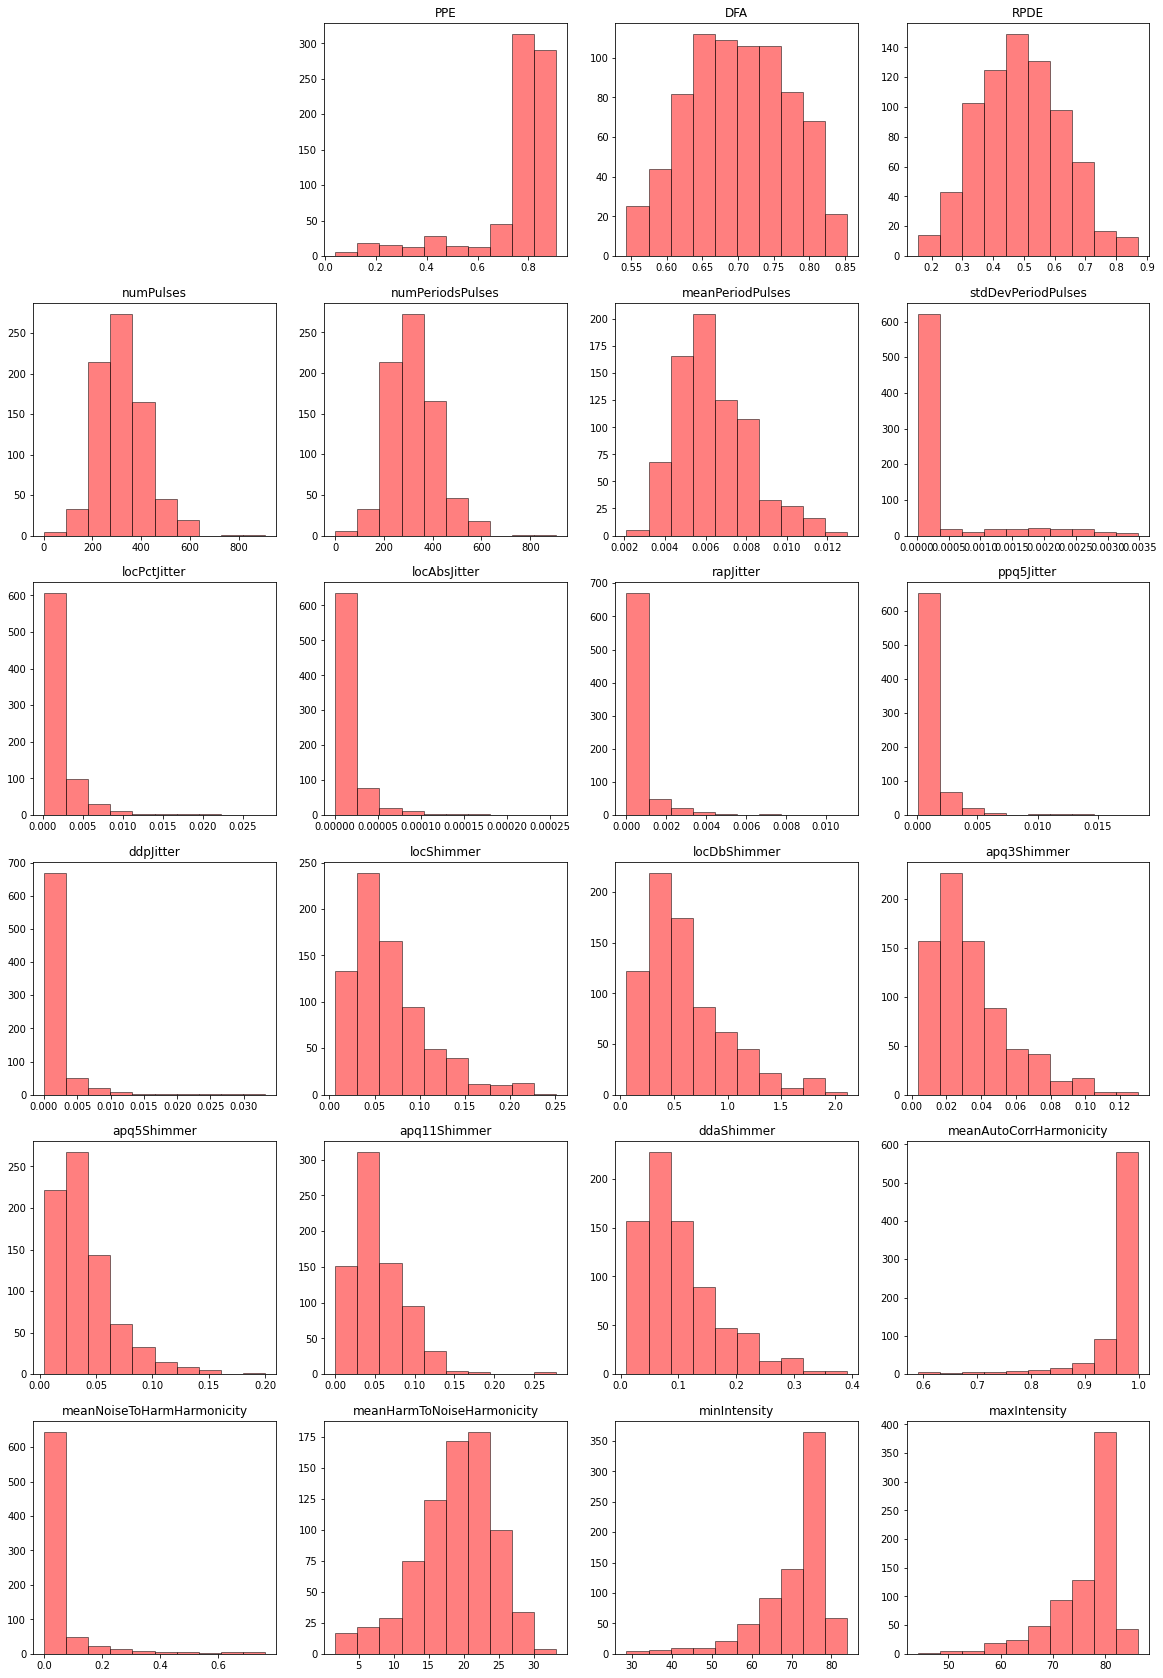

In [7]:
# Plotting histogram of the columns to study the data distribution
#EDA(exploratory data analysis) Distribution

import seaborn as sns  #importing seaborn for plotting
import matplotlib.pyplot as plt   #importing matplotlib

plt.figure(figsize=(20,30))

# using for loop to iterate over all the columns in the dataframe and plot the histogram of those

for i in range(2,25):
    col =  df.columns[i]
    plt.subplot(6,4,i)
    plt.hist(df[col],color='red', edgecolor = 'black', alpha = 0.5)
#     sns.distplot(df[col],kde=False)
    plt.title(col)

In [8]:
#Split the dataset into training and test set in the ratio of 70:30 
from sklearn.model_selection import train_test_split  #importing train_test_split

x = df.drop('class',1)  # predictors
y = df['class']           # target attributez

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)  # making 70:30 split

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(529, 754)
(529,)
(227, 754)
(227,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [9]:
from sklearn.preprocessing import MinMaxScaler

rc = MinMaxScaler() # instantiating the object for minmaxscaler

columns = list(x_train.columns)  # storing the columns

x_train_scaled = pd.DataFrame(rc.fit_transform(x_train))
x_train_scaled.columns = columns  # assigning the columns after scaling the values

x_test_scaled = pd.DataFrame(rc.fit_transform(x_test))
x_test_scaled.columns = columns  # assigning the columns after scaling the values

In [10]:
#importing the algorithm
from sklearn.linear_model import LogisticRegression

# create an instance for LogisticRegression
Logistic = LogisticRegression(solver="liblinear")

# fit the model
Logistic.fit(x_train_scaled, y_train)

# predict on created model
logistic_predict = Logistic.predict(x_test_scaled)

acc_logistic_test = Logistic.score(x_test_scaled, y_test)*100

result_df = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy' : [acc_logistic_test]}).drop_duplicates()
result_df

,Model,Accuracy
0,Logistic Regression,84.581498


In [11]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes as all the columns are numerical

# create an instance for GaussianNB
naive_model = GaussianNB()

# fit the model
naive_model.fit(x_train_scaled, y_train)

# prediction using created model
naive_predict = naive_model.predict(x_test_scaled)

acc_naive_test = naive_model.score(x_test_scaled, y_test)*100

tempResult_df = pd.DataFrame({'Model': ['Naive Bayes'], 'Accuracy' : [acc_naive_test]})
result_df = pd.concat([result_df,tempResult_df]).drop_duplicates()
result_df

,Model,Accuracy
0,Logistic Regression,84.581498
0,Naive Bayes,26.872247


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# create instance for KNeighborsClassifier and using k value = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn_model.fit(x_train_scaled, y_train)

# prediction using created model
knn_predict = knn_model.predict(x_test_scaled)
# checking the score of the test set
acc_knn_test = knn_model.score(x_test_scaled, y_test)*100 
# storing accuracy results of each model in the dataframe for final comparision 
tempResult_df = pd.DataFrame({'Model': ['KNN'], 'Accuracy' : [acc_knn_test]})
result_df = pd.concat([result_df,tempResult_df]).drop_duplicates() 
result_df
result_df

,Model,Accuracy
0,Logistic Regression,84.581498
0,Naive Bayes,26.872247
0,KNN,85.903084


In [13]:
#since knn classifer found out to be more accurate 
import pickle 
pickle.dump(knn_model,open('MulReg.pkl','wb'))

In [14]:
re= pickle.load(open('MulReg.pkl','rb'))